## Q 23-40, 80 - 85

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

## 23.Function to find the center element in the list. (1 element in odd length list, 2 elements in even length list)

In [4]:
def findCenter(l):
    if len(l)%2 != 0: # in case of odd length list
        return(l[int(len(l)/2)]) # will return single element
    else: # incase of even length list
        return(l[int(len(l)/2)-1],l[int(len(l)/2)]) # will return two elements
    
l = ['ab',1,2,'cde',5,6]
print(findCenter(l))

# l = [1,2,3,4,7] - # used case for odd length list
# findCenter(l)

# n = int(input("Enter number of elements in the list : "))
# l = list(map(input("Enter the elements of the list : ").strip().split(',')))[:n] # Enter elements separated by comma

(2, 'cde')


## 24. Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions


In [5]:
df_ED = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'EDVisits')

In [6]:
df_ED_pivot = df_ED.pivot_table(index = 'ReasonForVisit', columns = 'EDDisposition', values = 'PatientID', aggfunc='count').fillna(0)

In [7]:
print(df_ED_pivot)

EDDisposition        Admitted  Discharged
ReasonForVisit                           
Accident                 39.0         0.0
Bleeding                 16.0        15.0
Car Accident             17.0         0.0
Chest Pain               94.0        15.0
Cough                     0.0         1.0
Fever                    46.0       188.0
Gun Shot                 16.0         0.0
Intoxication              0.0        30.0
Laceration                0.0        30.0
Migraine                 47.0       109.0
Pneumonia               136.0        65.0
Shortness of Breath      72.0        77.0
Stomach Ache             32.0       154.0


In [7]:
df_ED_pivot.stack() # stack the levels from columns to rows

ReasonForVisit       EDDisposition
Accident             Admitted          39.0
                     Discharged         0.0
Bleeding             Admitted          16.0
                     Discharged        15.0
Car Accident         Admitted          17.0
                     Discharged         0.0
Chest Pain           Admitted          94.0
                     Discharged        15.0
Cough                Admitted           0.0
                     Discharged         1.0
Fever                Admitted          46.0
                     Discharged       188.0
Gun Shot             Admitted          16.0
                     Discharged         0.0
Intoxication         Admitted           0.0
                     Discharged        30.0
Laceration           Admitted           0.0
                     Discharged        30.0
Migraine             Admitted          47.0
                     Discharged       109.0
Pneumonia            Admitted         136.0
                     Discharged        65

In [8]:
df_ED_pivot
df_ED_pivot.unstack()

EDDisposition  ReasonForVisit     
Admitted       Accident                39.0
               Bleeding                16.0
               Car Accident            17.0
               Chest Pain              94.0
               Cough                    0.0
               Fever                   46.0
               Gun Shot                16.0
               Intoxication             0.0
               Laceration               0.0
               Migraine                47.0
               Pneumonia              136.0
               Shortness of Breath     72.0
               Stomach Ache            32.0
Discharged     Accident                 0.0
               Bleeding                15.0
               Car Accident             0.0
               Chest Pain              15.0
               Cough                    1.0
               Fever                  188.0
               Gun Shot                 0.0
               Intoxication            30.0
               Laceration              30

## 25.Plot a graph by counting the no. of patients in each department

In [9]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)

In [10]:
df['AmbulatoryVisits'].head()

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show


[Text(0.5, 1.0, 'Department wise total count of patients')]


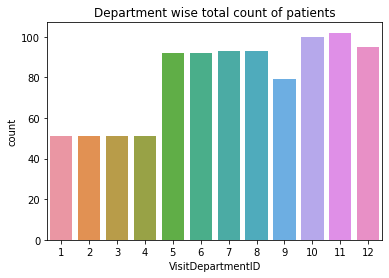

In [12]:
print(sns.countplot(x= df['AmbulatoryVisits']['VisitDepartmentID']).set(title = 'Department wise total count of patients' ))

## 26. Using Arrays and Loops, find the count of of patients based on gender

In [10]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
df['Patients'].head() # check the first few records

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


In [14]:
type(df['Patients']['Gender']) # check type of dataframe column

pandas.core.series.Series

In [15]:
g_array = df['Patients']['Gender'].to_numpy() # converting gender column to array

In [16]:
g_array.shape # checking numberof records in array

(945,)

In [17]:
count_m=0
count_f=0
for val in g_array:
    if val=="Male":
        count_m += 1
    else:
        count_f += 1
print('Total Male Patients:' ,count_m)
print('Total Female Patients:' ,count_f)    
        

Total Male Patients: 537
Total Female Patients: 408


## 27.Plot a graph to count the patients based on discharge disposition


In [18]:
 df['ReAdmissionRegistry'].head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN


In [19]:
dis_count = df['ReAdmissionRegistry']['DischargeDisposition'].value_counts()
dis_count

Home        577
Expired     104
Transfer     39
Name: DischargeDisposition, dtype: int64

[Text(0.5, 1.0, 'Count of Patients based on Discharge Disposition')]

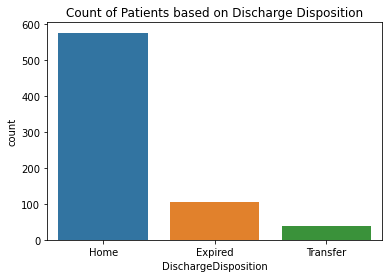

In [20]:
sns.countplot(x= df['ReAdmissionRegistry']['DischargeDisposition']).set(title = 'Count of Patients based on Discharge Disposition')

## 28. Which reason of visit has maximum mortality rate

In [19]:
newdf_1 = df['Discharges'].filter(['PatientID', 'DischargeDisposition'])
newdf_2 = df['EDUnique'].filter(['PatientID','ReasonForVisit'])
newdf_3 = pd.merge(newdf_1, newdf_2, on='PatientID')
len(newdf_1), len(newdf_2), len(newdf_3)
# new_df_3.groupby(['DischargeDisposition','ReasonForVisit']).count()

(720, 945, 720)

In [20]:
newdf_4= newdf_3.groupby(['DischargeDisposition']).get_group("Expired")
newdf_5 = newdf_4.groupby(['ReasonForVisit','DischargeDisposition']).count().sort_values("PatientID", ascending = False)
newdf_5.head()
# Fever has the max mortality count

,,PatientID
ReasonForVisit,DischargeDisposition,
Fever,Expired,22
Pneumonia,Expired,19
Stomach Ache,Expired,17
Chest Pain,Expired,12
Shortness of Breath,Expired,10


## 29. Calculate average LOS

In [25]:
df['Discharges'].head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468


In [26]:
df['Discharges']['LOS']= (df['Discharges']['DischargeDate'] - df['Discharges']['AdmissionDate']).dt.days
# calculates the difference between dates in days

In [27]:
print(round(df['Discharges']['LOS'].mean(),2)) # Average LOS

9.53


## 30.Which patientid has most entries in readmission registry

In [28]:
 print(df['ReAdmissionRegistry']['PatientID'].value_counts())
# Patient ID 23 has the most entries in the readmission registry

23     3
257    2
14     2
300    2
26     2
      ..
249    1
250    1
251    1
252    1
742    1
Name: PatientID, Length: 704, dtype: int64


## 31. Find count of White Spanish Male


In [15]:
men_white = df['Patients'][(df['Patients']['Gender'] == 'Male') & (df['Patients']['Race'] == 'White') & (df['Patients']['Language']== 'Spanish')].agg({'PatientID':'count'})
print(men_white) # Count of White Spanish Male = 15

PatientID    15
dtype: int64


## 32. Write a function to print the table of the given number

In [30]:
n = int(input('Enter a number:' )) 
count = 1
while count <= 10:
    n = n*1
    print(n, 'x', count, '=', n*count)
    count += 1

Enter a number:5
5 x 1 = 5
5 x 2 = 10
5 x 3 = 15
5 x 4 = 20
5 x 5 = 25
5 x 6 = 30
5 x 7 = 35
5 x 8 = 40
5 x 9 = 45
5 x 10 = 50


## 33. Using a bar chart, which Service had the lowest count of Expected Mortality?

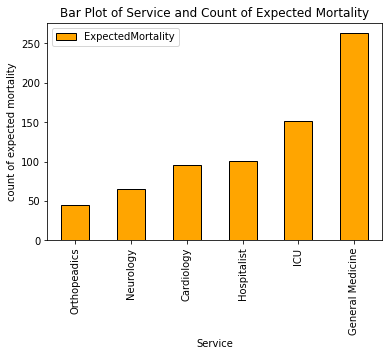

In [31]:
exp_mor = df['Discharges'].groupby(['Service']).agg({'ExpectedMortality': 'count'}).sort_values('ExpectedMortality', ascending = True)
exp_mor.plot.bar(color = 'orange', edgecolor = 'black')
plt.title('Bar Plot of Service and Count of Expected Mortality')
plt.xlabel('Service')
plt.ylabel('count of expected mortality')
plt.show()

# Orthopeadics has the lowest count of expected mortality

## 34. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17

In [32]:
x = np.arange(1,31).reshape(6,5)
print(x[2:4,0:2])

[[11 12]
 [16 17]]


## 35. np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20

In [33]:
y = np.arange(1,31).reshape(6,5)
print(np.diag(y, k=1))

[ 2  8 14 20]


## 36.Create a correlation matrix on EDVisits

In [34]:
cor_matrix = df['EDVisits'].corr()
print(cor_matrix)

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


## 37.Write a function to print all the upper case letter of a given sentence

In [35]:
sample = input('Enter a sentence')
print(sample.upper())

Enter a sentenceThe weather is sunny
THE WEATHER IS SUNNY


## 38. Number of patients on 'Transfer' based on primary diagnosis

In [37]:
df_t = df['ReAdmissionRegistry'].groupby(['DischargeDisposition']).get_group ('Transfer') # group by using DischargeDisposition
df_p = df_t.groupby(['PrimaryDiagnosis']).agg({'PatientID': 'count'}).sort_values('PatientID', ascending = True) # group by using PrimaryDiagnosis
print(df_p)
# Total no. of patients = 39

                  PatientID
PrimaryDiagnosis           
Afib                      1
Knee Replacement          1
Laceration                1
Pain                      1
Flu                       2
Diabetes                  7
Pneumonia                 8
Heart Failure             9
Stroke                    9


## 39. Get the FirstName, LastName,DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit

In [38]:
new_pat = df['Patients'].filter(['PatientID','FirstName','LastName', 'DateOfBirth'], axis = 1)
print(new_pat.head())
new_ed = df['EDUnique'].filter(['PatientID','ReasonForVisit'], axis = 1)
print(new_ed.head())

   PatientID FirstName LastName             DateOfBirth
0          1     Lanni      Sue 1960-01-01 00:00:00.000
1          2       Far    Myers 1985-11-15 02:08:42.090
2          3   Devlin   Michael 1976-04-15 02:52:09.762
3          4   Carmine    Texas 1968-10-15 03:32:13.635
4          5     Tann      Bama 1962-05-01 19:12:58.950
   PatientID ReasonForVisit
0          1   Stomach Ache
1         12       Migraine
2         13   Stomach Ache
3         14       Migraine
4         15     Chest Pain


In [39]:
new_merge= pd.merge(new_pat, new_ed, on = 'PatientID')
# print(new_merge.head())

# Deriving patients who visited for Migraine
print(new_merge[new_merge['ReasonForVisit']== 'Migraine']) # 116 patients whose reason of visit was Migraine

     PatientID FirstName  LastName             DateOfBirth ReasonForVisit
1            2       Far     Myers 1985-11-15 02:08:42.090       Migraine
2            3   Devlin    Michael 1976-04-15 02:52:09.762       Migraine
11          12    Zonnya        Ab 1963-05-23 10:04:33.074       Migraine
13          14       Gan        Yu 1970-06-02 06:22:54.675       Migraine
21          22    Joesph      Long 1979-12-04 16:45:56.080       Migraine
..         ...       ...       ...                     ...            ...
896        897   Barrows  Coupland 1979-10-31 18:28:35.483       Migraine
907        908      Knox     Group 1975-08-25 22:27:50.177       Migraine
909        910   Kuvalis  Coupland 1986-05-23 19:23:27.752       Migraine
914        915  Jerrilyn     Dyson 1978-01-18 02:41:55.178       Migraine
923        924    Daniel  Shakesby 1980-11-28 17:57:03.702       Migraine

[116 rows x 5 columns]


## 40. Plot a graph showing the count of patients for the reason visited the hospotal.

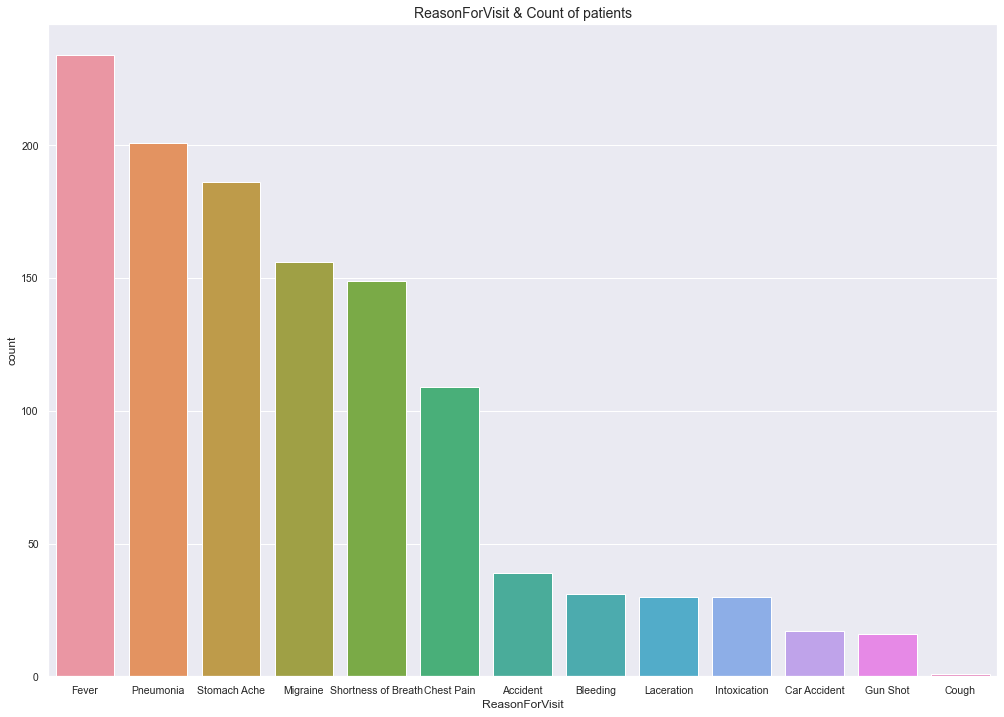

In [52]:
sns.countplot(x = 'ReasonForVisit', data = df['EDVisits'], order= df['EDVisits']['ReasonForVisit'].value_counts().index).set(title = 'ReasonForVisit & Count of patients')
sns.set(rc={'figure.figsize':(17,12)})
plt.title('ReasonForVisit & Count of patients', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10.5)
plt.show()

In [1162]:
df['EDVisits'].groupby(['ReasonForVisit'])['PatientID'].count().sort_values(ascending = True)

ReasonForVisit
Cough                    1
Gun Shot                16
Car Accident            17
Intoxication            30
Laceration              30
Bleeding                31
Accident                39
Chest Pain             109
Shortness of Breath    149
Migraine               156
Stomach Ache           186
Pneumonia              201
Fever                  234
Name: PatientID, dtype: int64

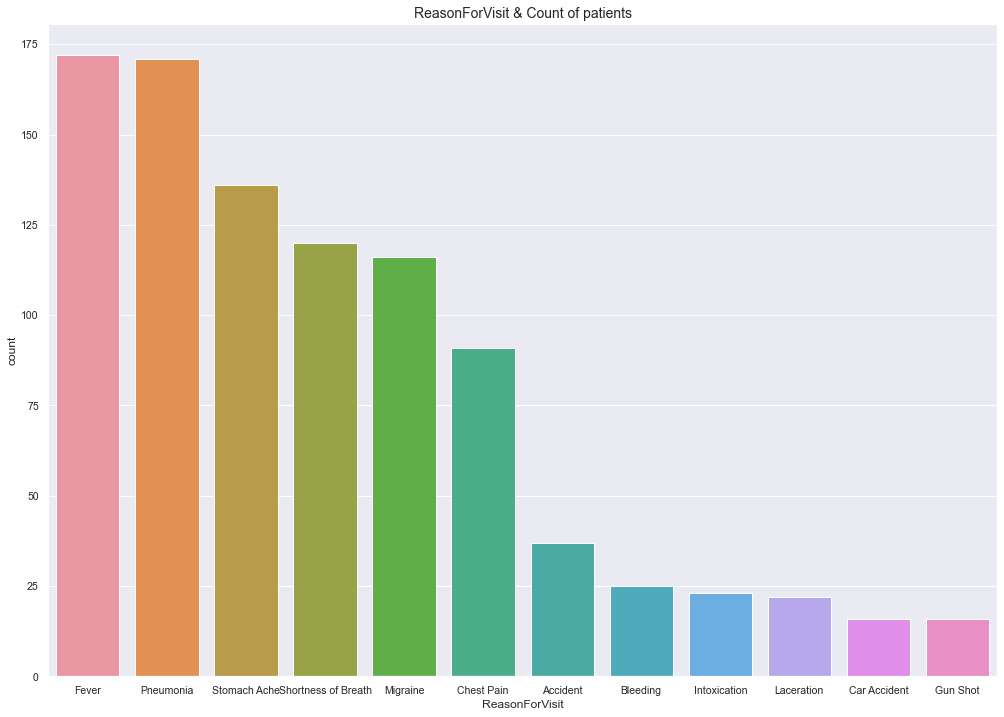

In [49]:
sns.countplot(x = 'ReasonForVisit', data = df['EDUnique'], order= df['EDUnique']['ReasonForVisit'].value_counts().index).set(title = 'ReasonForVisit & Count of patients')
sns.set(rc={'figure.figsize':(17,12)})
plt.title('ReasonForVisit & Count of patients', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10.5)
plt.show()

In [1213]:
df['EDUnique'].groupby(['ReasonForVisit'])['PatientID'].count().sort_values(ascending = True)

ReasonForVisit
Car Accident            16
Gun Shot                16
Laceration              22
Intoxication            23
Bleeding                25
Accident                37
Chest Pain              91
Migraine               116
Shortness of Breath    120
Stomach Ache           136
Pneumonia              171
Fever                  172
Name: PatientID, dtype: int64

## 80.Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups)

In [67]:
p_grp = list(df['Providers'].groupby('ProviderSpecialty').groups)
print(p_grp)

['Cardiology', 'Pediatrics', 'PrimaryCare', 'Surgery']


## 81. Display full name of patients 

In [85]:
df_fullname = df['Patients']['FirstName'] + ' ' + df['Patients']['LastName']
print(df_fullname)

0             Lanni Sue
1             Far Myers
2       Devlin  Michael
3         Carmine Texas
4            Tann  Bama
             ...       
940         Wat Fideler
941     Wandie Baythrop
942     Diahann Smeeton
943    Panchito Sharple
944        Walsh Calvie
Length: 945, dtype: object


pandas.core.series.Series

## 82. Retrieve the rows where SBP<140 and DBP<80

In [110]:
bp_rows = df['AmbulatoryVisits'][(df['AmbulatoryVisits']['BloodPressureSystolic'] < 140) & (df['AmbulatoryVisits']['BloodPressureDiastolic'] < 80)]
print(bp_rows)

     VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
5        809         894          31  2019-03-13 2019-02-28 10:28:01.091   
16       707         859          36  2019-03-16 2019-02-26 17:42:39.779   
18       503         887          12  2019-01-21 2019-01-07 06:04:17.575   
19       710         862           1  2019-03-19 2019-03-03 11:39:03.145   
23       711         863           1  2019-03-20 2019-03-10 07:34:56.766   
..       ...         ...         ...         ...                     ...   
909      177         815          32  2019-02-22 2019-02-04 06:53:41.987   
929      786         871          34  2019-03-25 2019-02-26 09:48:42.832   
932      394         623           6  2019-02-05 2019-01-10 05:43:34.544   
941      399         638          11  2019-02-10 2019-02-02 20:49:56.868   
943      403         650          15  2019-02-14 2019-02-11 00:47:42.216   

     VisitDepartmentID     VisitType  BloodPressureSystolic  \
5                    2  

## 83 Create the plot where x= np.arange(0, 10, 0.1) and y= np.sin(np.pi * x) + x by adding two axes to a figure object at [0.1,0.1,0.9,0.9] & [0.2,0.6,0.3,0.3]

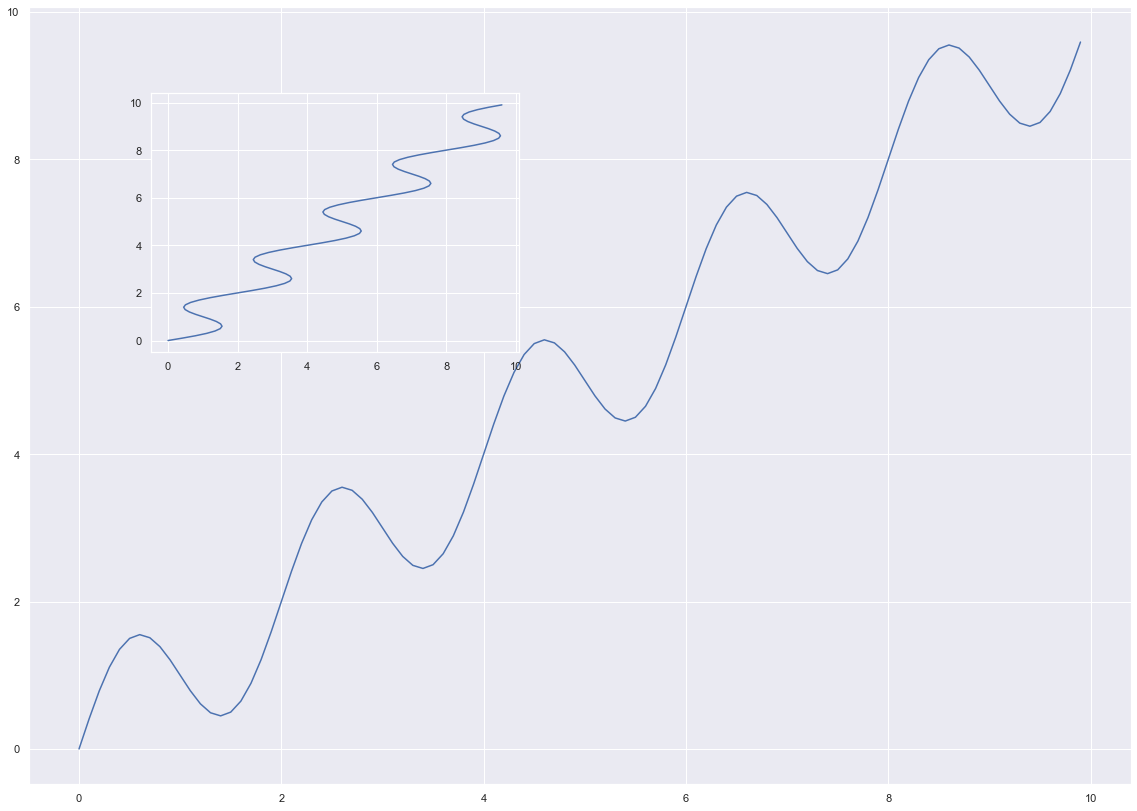

In [159]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

fig=plt.figure()

fig_m= fig.add_axes([0.1,0.1,0.9,0.9])

fig_i=fig.add_axes([0.2,0.6,0.3,0.3])
fig_m.plot(x,y)
fig_i.plot(y,x)
plt.show()

## 84. Find the list of patients whose ExpectedLOS is greater than the value given by the user

In [14]:
df['ReAdmissionRegistry'].head()
u_value = float(input("Enter expected LOS: "))
a_los = df['ReAdmissionRegistry'][df['ReAdmissionRegistry']['ExpectedLOS'] > u_value]
print(a_los)

Enter expected LOS: 5
     AdmissionID  PatientID AdmissionDate           DischargeDate  \
0            389          1    2018-01-01 2018-01-04 19:59:31.391   
4            640          6    2018-01-01 2018-01-05 14:18:30.029   
5            434          7    2018-01-01 2018-01-06 13:01:00.276   
6            549          8    2018-01-01 2018-01-07 15:39:25.987   
7              1          9    2018-01-01 2018-01-07 18:06:06.408   
..           ...        ...           ...                     ...   
712          692        735    2018-02-22 2018-03-07 06:41:40.164   
714          533        737    2018-02-22 2018-03-07 19:50:58.083   
715          521        738    2018-02-22 2018-03-07 21:22:10.061   
716          548        739    2018-02-22 2018-03-08 02:43:18.749   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

    DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                   Home       Hospitalist   Kidney Failure     6.717771 

## 85.Find count of Black/African American, English Females

In [152]:
cnt_f = df['Patients'][(df['Patients']['Race'] == 'Black/African-American') & (df['Patients']['Language']== 'English') & (df['Patients']['Gender'] == 'Female')]['PatientID'].count()
print(cnt_f)

119
